Import all required libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score


Lets first import the data. We will look at both red and white wine seperately.

In [7]:
# Load datasets
df_red = pd.read_csv("Data/Raw/Wine_Datasets/UCI_Wines/winequality-red.csv", sep=';')
df_white = pd.read_csv("Data/Raw/Wine_Datasets/UCI_Wines/winequality-white.csv", sep=';')

# Remove outliers

def remove_outliers(df, column):
    """
    Removes outliers from a specified column in a DataFrame using the IQR method.
    
    Parameters:
    - df: pandas DataFrame
    - column: column name (string) to check for outliers
    
    Returns:
    - DataFrame with outliers removed
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

df_red = remove_outliers(df_red, 'quality')
df_white = remove_outliers(df_white, 'quality')

# Reclassify quality into categories
def categorize_quality(q):
    if q <= 3:
        return "low"
    elif q <= 6:
        return "medium"
    else:
        return "high"

df_red["quality_category"] = df_red["quality"].apply(categorize_quality)
df_white["quality_category"] = df_white["quality"].apply(categorize_quality)

# Prepare datasets in a dictionary for easy looping
datasets = {
    "Red Wine": df_red,
    "White Wine": df_white
}

for name, df in datasets.items():
    print(f"\n=== {name} ===")
    
    # Separate features and labels
    X = df.drop(["quality", "quality_category"], axis=1)
    y = df["quality_category"]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



=== Red Wine ===

=== White Wine ===


Logistic Regression

Logistic Regression Accuracy (3 categories): 0.827
low     Precision: 0.000  Recall: 0.000  F1: 0.000
medium  Precision: 0.831  Recall: 0.981  F1: 0.900
high    Precision: 0.754  Recall: 0.224  F1: 0.345


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


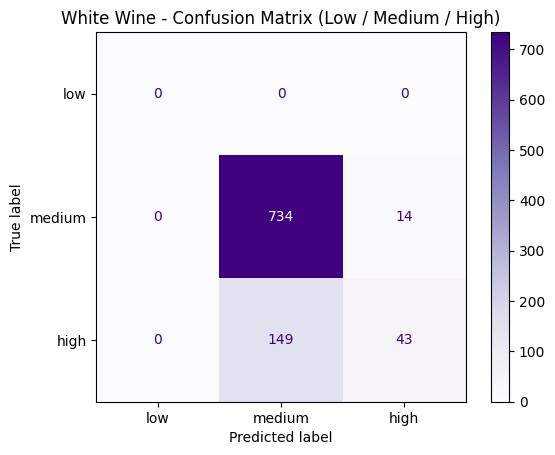

In [8]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
# Logistic Regression (multinomial)
log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000, random_state=42)
log_model.fit(X_train_scaled, y_train)
    
# Predictions
y_pred = log_model.predict(X_test_scaled)
    
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy (3 categories): {acc:.3f}")

# Precision, recall and F1 score (balance of the two)
labels = ["low", "medium", "high"]
precisions = precision_score(y_test, y_pred, labels=labels, average=None, zero_division=0)
recalls = recall_score(y_test, y_pred, labels=labels, average=None, zero_division=0)
f1s = f1_score(y_test, y_pred, labels=labels, average=None, zero_division=0)

for lab, p, r, f in zip(labels, precisions, recalls, f1s):
    print(f"{lab:6s}  Precision: {p:.3f}  Recall: {r:.3f}  F1: {f:.3f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=["low", "medium", "high"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["low", "medium", "high"])
disp.plot(cmap="Purples", values_format="d")
plt.title(f"{name} - Confusion Matrix (Low / Medium / High)")
plt.show()

K-Nearest-Neighbour


=== Red Wine ===
KNN Accuracy (k=5): 0.870
low     Precision: 0.000  Recall: 0.000  F1: 0.000
medium  Precision: 0.892  Recall: 0.963  F1: 0.926
high    Precision: 0.630  Recall: 0.354  F1: 0.453
KNN Accuracy (k=5): 0.870
low     Precision: 0.000  Recall: 0.000  F1: 0.000
medium  Precision: 0.892  Recall: 0.963  F1: 0.926
high    Precision: 0.630  Recall: 0.354  F1: 0.453


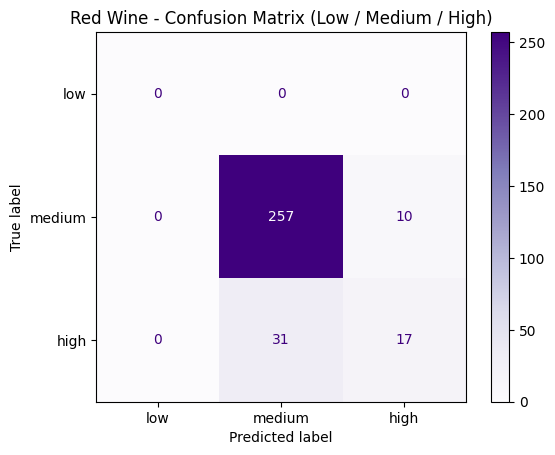


=== White Wine ===
KNN Accuracy (k=5): 0.850
low     Precision: 0.000  Recall: 0.000  F1: 0.000
medium  Precision: 0.876  Recall: 0.945  F1: 0.909
high    Precision: 0.692  Recall: 0.479  F1: 0.566
low     Precision: 0.000  Recall: 0.000  F1: 0.000
medium  Precision: 0.876  Recall: 0.945  F1: 0.909
high    Precision: 0.692  Recall: 0.479  F1: 0.566


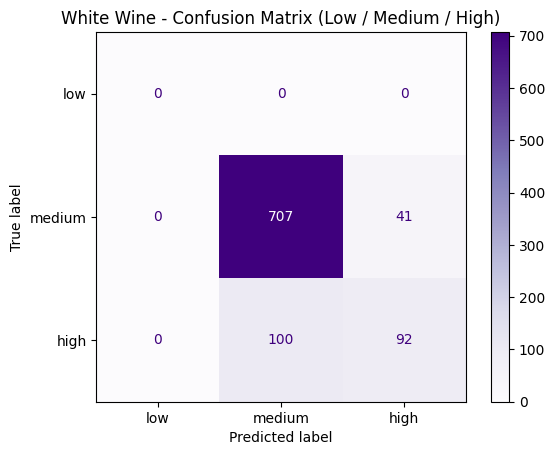

In [9]:
# Set number of neighbors for KNN
k = 5

for name, df in datasets.items():
    print(f"\n=== {name} ===")
    
    # Separate features and labels
    X = df.drop(["quality", "quality_category"], axis=1)
    y = df["quality_category"]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # K-Nearest Neighbors classifier
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = knn_model.predict(X_test_scaled)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"KNN Accuracy (k={k}): {acc:.3f}")

    # Precision, recall and F1 score (balance of the two)
    labels = ["low", "medium", "high"]
    precisions = precision_score(y_test, y_pred, labels=labels, average=None, zero_division=0)
    recalls = recall_score(y_test, y_pred, labels=labels, average=None, zero_division=0)
    f1s = f1_score(y_test, y_pred, labels=labels, average=None, zero_division=0)

    for lab, p, r, f in zip(labels, precisions, recalls, f1s):
        print(f"{lab:6s}  Precision: {p:.3f}  Recall: {r:.3f}  F1: {f:.3f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=["low", "medium", "high"])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["low", "medium", "high"])
    disp.plot(cmap="Purples", values_format="d")
    plt.title(f"{name} - Confusion Matrix (Low / Medium / High)")
    plt.show()

Neural Network

Neural Network Accuracy (3 categories, 3 layers of 15 nodes): 0.831
low     Precision: 0.000  Recall: 0.000  F1: 0.000
medium  Precision: 0.866  Recall: 0.932  F1: 0.898
high    Precision: 0.622  Recall: 0.438  F1: 0.514


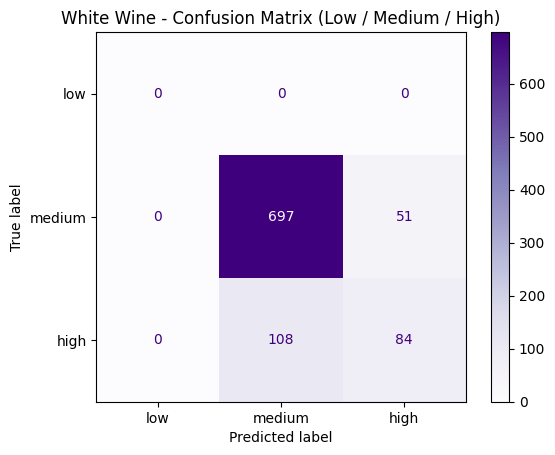

In [10]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural network with 3 hidden layers, each with 15 nodes
mlp_model = MLPClassifier(hidden_layer_sizes=(12, 12, 12), max_iter=2000, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = mlp_model.predict(X_test_scaled)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Neural Network Accuracy (3 categories, 3 layers of 15 nodes): {acc:.3f}")

# Precision, recall and F1 score (balance of the two)
labels = ["low", "medium", "high"]
precisions = precision_score(y_test, y_pred, labels=labels, average=None, zero_division=0)
recalls = recall_score(y_test, y_pred, labels=labels, average=None, zero_division=0)
f1s = f1_score(y_test, y_pred, labels=labels, average=None, zero_division=0)

for lab, p, r, f in zip(labels, precisions, recalls, f1s):
    print(f"{lab:6s}  Precision: {p:.3f}  Recall: {r:.3f}  F1: {f:.3f}")
    
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=["low", "medium", "high"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["low", "medium", "high"])
disp.plot(cmap="Purples", values_format="d")
plt.title(f"{name} - Confusion Matrix (Low / Medium / High)")
plt.show()


Random Forest


=== Red Wine ===
Random Forest Accuracy: 0.892
low     Precision: 0.000  Recall: 0.000  F1: 0.000
medium  Precision: 0.903  Recall: 0.978  F1: 0.939
high    Precision: 0.769  Recall: 0.417  F1: 0.541


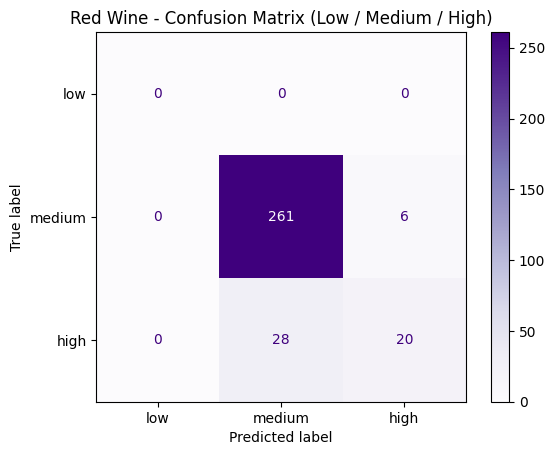


=== White Wine ===
Random Forest Accuracy: 0.890
low     Precision: 0.000  Recall: 0.000  F1: 0.000
medium  Precision: 0.889  Recall: 0.985  F1: 0.935
high    Precision: 0.901  Recall: 0.521  F1: 0.660


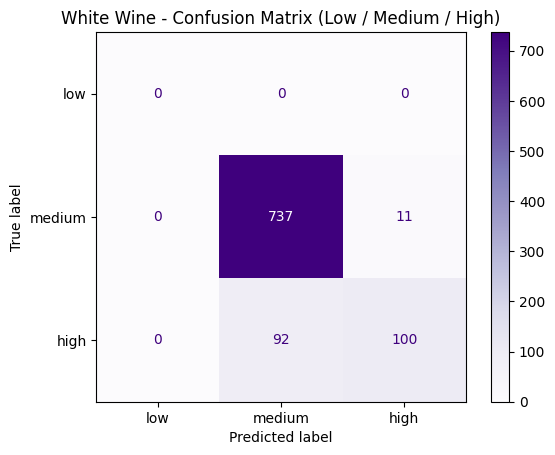

In [11]:
# Prepare datasets in a dictionary for easy looping
datasets = {
    "Red Wine": df_red,
    "White Wine": df_white
}

for name, df in datasets.items():
    print(f"\n=== {name} ===")
    
    # Separate features and labels
    X = df.drop(["quality", "quality_category"], axis=1)
    y = df["quality_category"]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Optional: Scale features (Random Forests don't require scaling, but it doesn't hurt)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Random Forest classifier
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = rf_model.predict(X_test_scaled)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Random Forest Accuracy: {acc:.3f}")
    
    # Precision, recall and F1 score (balance of the two)
    labels = ["low", "medium", "high"]
    precisions = precision_score(y_test, y_pred, labels=labels, average=None, zero_division=0)
    recalls = recall_score(y_test, y_pred, labels=labels, average=None, zero_division=0)
    f1s = f1_score(y_test, y_pred, labels=labels, average=None, zero_division=0)

    for lab, p, r, f in zip(labels, precisions, recalls, f1s):
        print(f"{lab:6s}  Precision: {p:.3f}  Recall: {r:.3f}  F1: {f:.3f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=["low", "medium", "high"])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["low", "medium", "high"])
    disp.plot(cmap="Purples", values_format="d")
    plt.title(f"{name} - Confusion Matrix (Low / Medium / High)")
    plt.show()

From these different models, the most effective is the Random Forest model with an accuracy score of 0.9 for red wine and 0.885 for white wine.

Hence we should use this model to predict the quality of the wine based on its features.

From here, we now need to show how quality relates to price of wine. 